In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

### [당뇨병 발병원인]
당뇨병 발생을 예측하기 위해 의사결정나무 분석을 실시하고 결과를 해석하라.

#### 1.데이터 구성하기

In [71]:
df_raw = pd.read_csv('/home/pirl/Downloads/data2_py/DIABETES.csv',encoding='CP949')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


* Y :목표변수, 당뇨 발병확률
* AGE : 나이
* GENDER : 성별
* BMI : 체질량 지수
* BP : 혈압
* CHOLESTEROL : 총 콜레스테롤
* LDL : LDL 수치
* HDL : HDL 수치
* TCH : TCH 수치
* LTG : 라모트리진
* GLUCOSE : 포도당

In [72]:
#요약 통계량
df_raw.describe().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.00,442.000,442.000
mean,152.133,48.518,1.468,26.376,94.647,189.140,115.439,49.788,4.07,4.641,91.260
std,77.093,13.109,0.500,4.418,13.831,34.608,30.413,12.934,1.29,0.522,11.496
min,25.000,19.000,1.000,18.000,62.000,97.000,41.600,22.000,2.00,3.258,58.000
25%,87.000,38.250,1.000,23.200,84.000,164.250,96.050,40.250,3.00,4.277,83.250
50%,140.500,50.000,1.000,25.700,93.000,186.000,113.000,48.000,4.00,4.620,91.000
75%,211.500,59.000,2.000,29.275,105.000,209.750,134.500,57.750,5.00,4.997,98.000
max,346.000,79.000,2.000,42.200,133.000,301.000,242.400,99.000,9.09,6.107,124.000


In [73]:
#결측치 확인
df_raw.isnull().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

결측치는 없음을 확인할 수 있다.

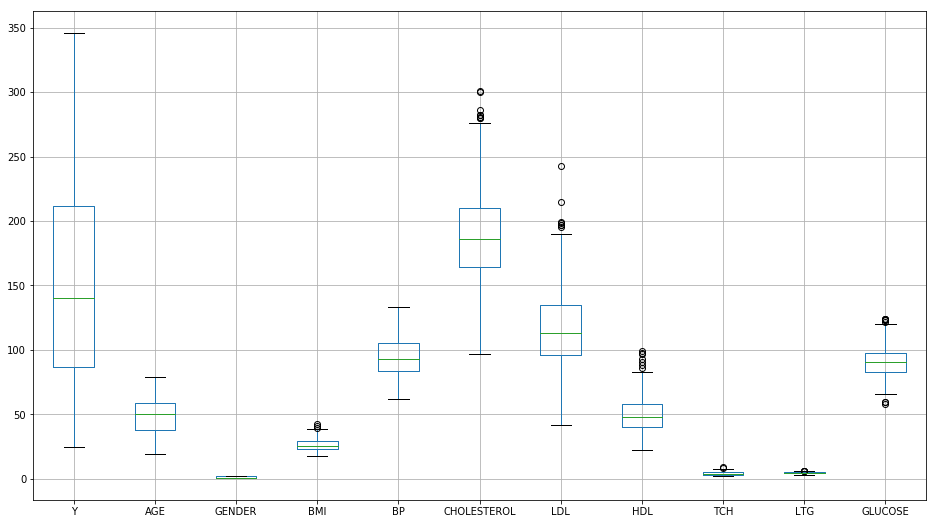

In [74]:
#이상치 확인
df_raw.boxplot(figsize=(16,9))

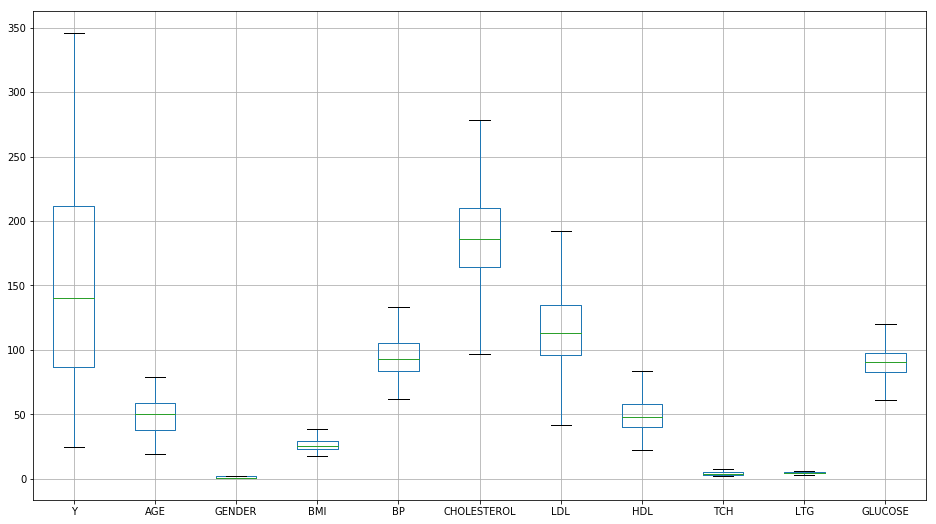

In [75]:
for i in range(1, 11, 1) :
   num1, num2 = np.percentile(df_raw.iloc[:,[i]], [25, 75])
   iqr_max = num2 + 1.5 * (num2- num1)
   iqr_min = num1 - 1.5 * (num2- num1)
   for j in range(0, len(df_raw.iloc[:,[i]])) :
       if (df_raw.iloc[j,i] > iqr_max):
           df_raw.iloc[j,i] = iqr_max
       elif (df_raw.iloc[j,i] < iqr_min) :
           df_raw.iloc[j,i] = iqr_min

df_raw.boxplot(figsize=(16,9))

모든 이상치를 제 3사분위 수 또는 제 1사분위 수로 조정하였다.

In [76]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop('Y',axis=1,inplace=False)

#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3, random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


#### 2. 모델생성

In [77]:
#train, test의 설명력 결과 저장
train_score=[];test_score=[]

#min_samples_leaf : 잎사귀 최소 자료 수 (마지막 노드의 데이터 수)
para_leaf =[n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,
                                min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

#결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [78]:
#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.135
1,2,0.953,-0.111
2,3,0.878,0.039
3,4,0.836,0.083
4,5,0.773,0.062
5,6,0.730,0.042
6,7,0.707,0.107
7,8,0.669,0.109
8,9,0.649,0.144
9,10,0.614,0.203


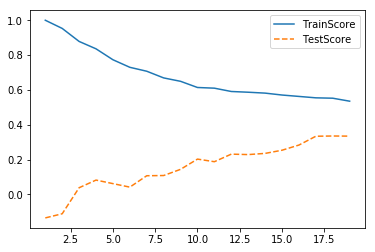

In [79]:
#모델 설명력 그래프 확인
plt.plot(para_leaf,train_score, linestyle='-',label='TrainScore')
plt.plot(para_leaf,test_score, linestyle='--',label='TestScore')
plt.legend()

train score와 test score 값이 크면서 둘의 차이가 적은 minsamplesleaf 를 찾아야한다.

In [80]:
df_score_leaf['TrainScore'] - df_score_leaf['TestScore']

0     1.134691
1     1.063884
2     0.839795
3     0.753429
4     0.711038
5     0.687792
6     0.599850
7     0.560351
8     0.505213
9     0.411069
10    0.422073
11    0.359614
12    0.357947
13    0.346023
14    0.316841
15    0.279159
16    0.220502
17    0.216917
18    0.200574
dtype: float64

차이가 적은 편이며, score값도 높은 minsamplesleaf : 12 를 선택한다.

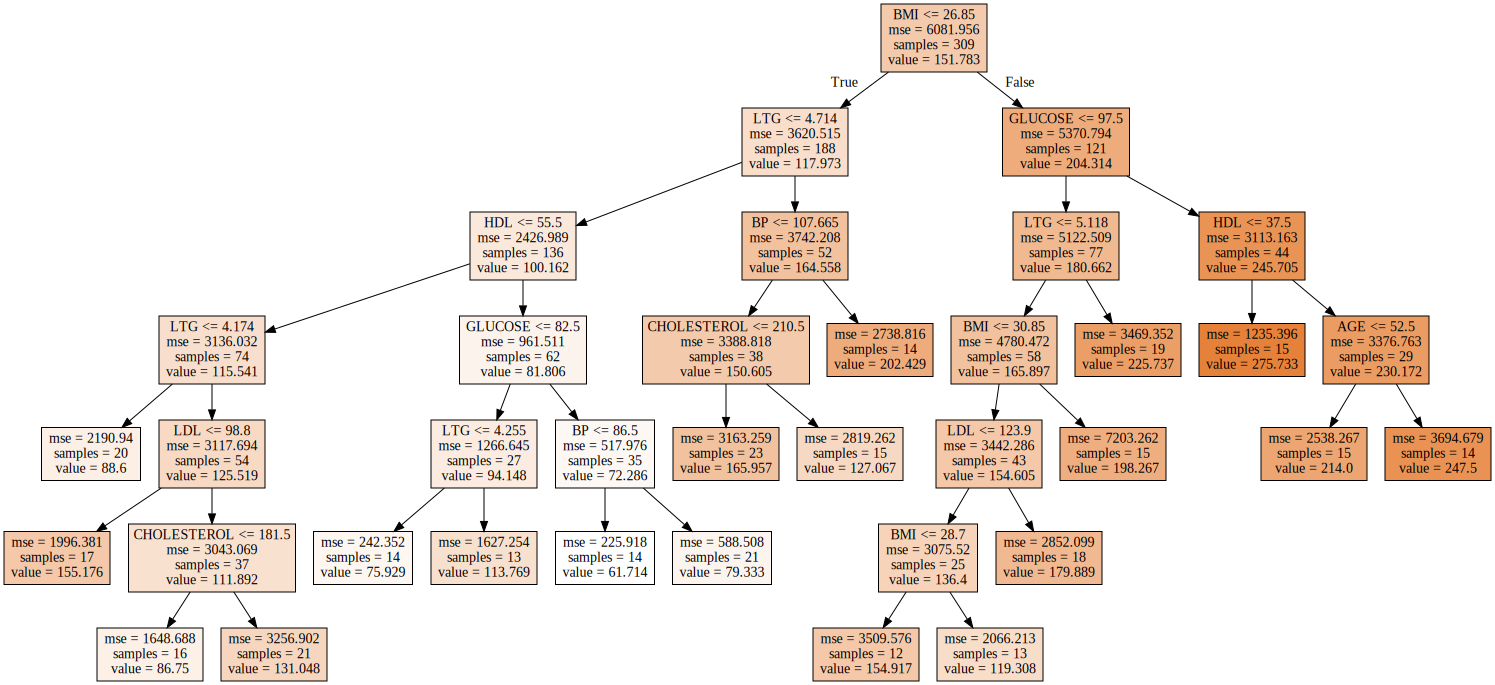

In [82]:
#변수명 저장
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 12
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 12)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [83]:
#train, test의 설명력 결과 저장
train_score=[];test_score=[]

#min_samples_leaf : 잎사귀 최소 자료 수
#min_samples_split : 분리노드의 최소 자료 수 (분리하기 위한 데이터 수)
para_split =[n_leaf * 2 for n_leaf in range(12,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234,
                                min_samples_leaf=12, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

#결과저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,24,0.591,0.231
1,26,0.587,0.229
2,28,0.582,0.236
3,30,0.577,0.225
4,32,0.577,0.225
5,34,0.577,0.225
6,36,0.576,0.222
7,38,0.566,0.221


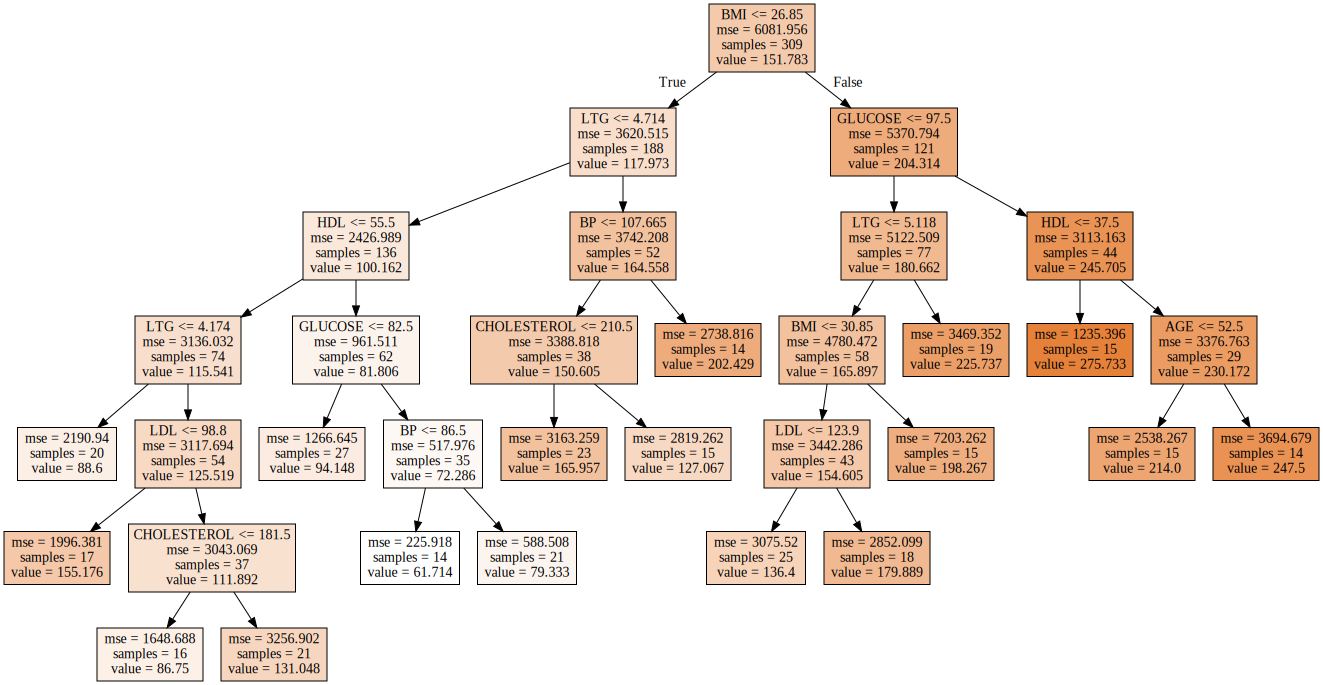

In [84]:
#분리노드의 최소 자료 수 28
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 12,
                                  min_samples_split=28)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [85]:
#train 및 test 설명력 결과 저장
train_score = []; test_score = []

#최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=12,
                                 min_samples_split=28, max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

#결과저장
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesSplit'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.292,0.231
1,2,0.438,0.351
2,3,0.511,0.279
3,4,0.549,0.275
4,5,0.572,0.235
5,6,0.582,0.236
6,7,0.582,0.236
7,8,0.582,0.236
8,9,0.582,0.236
9,10,0.582,0.236


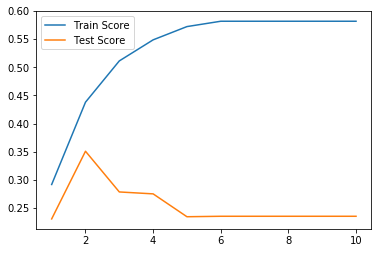

In [86]:
#모델 설명력 확인
df_score_depth.round(3)

#모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='-', label='Test Score')
plt.legend()

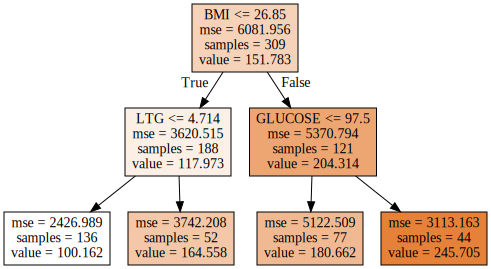

In [87]:
#최대 깊이 2모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 12,
                                  min_samples_split=28, max_depth=2)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

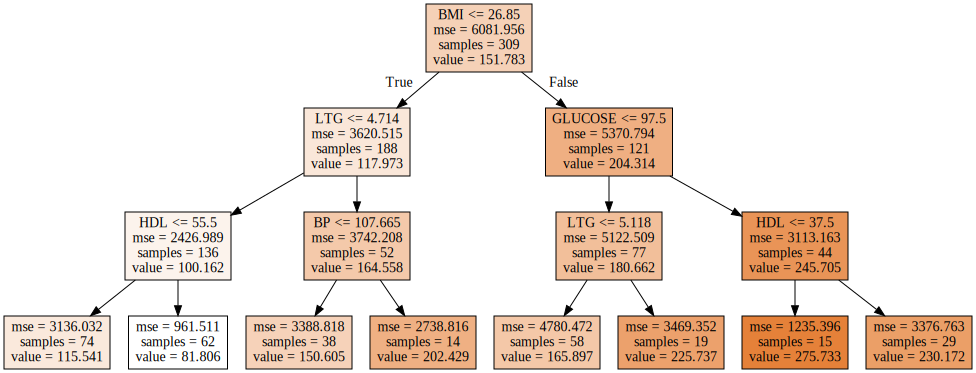

In [88]:
#최대 깊이 3모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 12,
                                  min_samples_split=28, max_depth=3)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 3. 최종 모델 생성

In [89]:
tree_final = DecisionTreeRegressor(min_samples_leaf=12, min_samples_split=28,
                                   max_depth=3, random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=12,
           min_samples_split=28, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [90]:
#train score, test score 값 구하기

print("Score on training set: {:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x,df_test_y)))

Score on training set: 0.511
Score on test set: 0.279


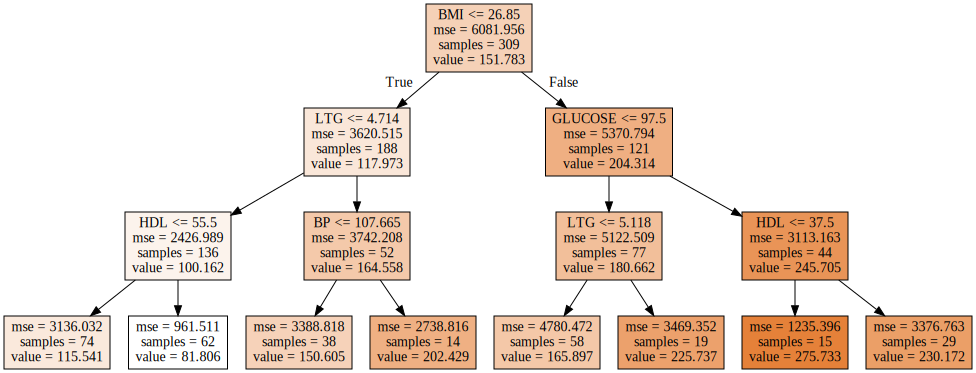

In [91]:
#최종 모델 시각화
export_graphviz(tree_final,out_file='tree_final.dot',
               feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_final.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#### 4. 결론도출

In [92]:
#설명변수의 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

#df_feature_importance의 테이블을 중요도별 정렬
df_importance.sort_values('Importance',ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.571
8,LTG,0.216
9,GLUCOSE,0.123
6,HDL,0.061
3,BP,0.029
0,AGE,0.000
1,GENDER,0.000
4,CHOLESTEROL,0.000
5,LDL,0.000
7,TCH,0.000


Text(0, 0.5, '변수')

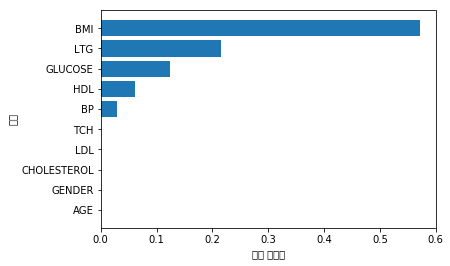

In [93]:
#설명변수 중요도 그래프
#중요도가 높은 그림을 상위에 그림
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')